In [40]:
import csv, pandas
import numpy as np

In [41]:
#ServerApp.iopub_data_rate_limit=(1000000.0*10)
with open('og-only.csv', newline='') as csvfile:
    reader = csv.reader(csvfile)
    data = list(reader)

npdata = np.array(data)
#print(npdata)
data = npdata[1:].transpose()

date = np.array(data[2])
injuries = np.array(data[12], dtype='int')
killed   = np.array(data[13], dtype='int')

print(date)
year = [int(fulldate.split('/')[2]) for fulldate in date]

['1/2/2008' '1/2/2008' '1/2/2008' ... '4/25/2019' '4/2/2017' '6/15/2018']


In [42]:
# -- Try counting collisions per year
crashdict = {}
for yr in year:
    if yr in crashdict:
        crashdict[yr] = crashdict[yr] + 1
    else:
        crashdict[yr] = 1
        
print(crashdict)
ordered_crash = sorted(crashdict.items())
print(ordered_crash)

{2008: 201, 2009: 183, 2010: 143, 2011: 156, 2012: 151, 2013: 148, 2014: 180, 2015: 177, 2016: 137, 2017: 246, 2023: 121, 2020: 116, 2018: 127, 2021: 114, 2019: 130, 2022: 97}
[(2008, 201), (2009, 183), (2010, 143), (2011, 156), (2012, 151), (2013, 148), (2014, 180), (2015, 177), (2016, 137), (2017, 246), (2018, 127), (2019, 130), (2020, 116), (2021, 114), (2022, 97), (2023, 121)]


## Plot Injuries each year

{2008: 92, 2009: 127, 2010: 82, 2011: 84, 2012: 93, 2013: 92, 2014: 97, 2015: 79, 2016: 70, 2017: 155, 2023: 110, 2020: 90, 2018: 86, 2021: 92, 2019: 109, 2022: 83}
[(2008, 92), (2009, 127), (2010, 82), (2011, 84), (2012, 93), (2013, 92), (2014, 97), (2015, 79), (2016, 70), (2017, 155), (2018, 86), (2019, 109), (2020, 90), (2021, 92), (2022, 83), (2023, 110)]
96.3125


<BarContainer object of 5 artists>

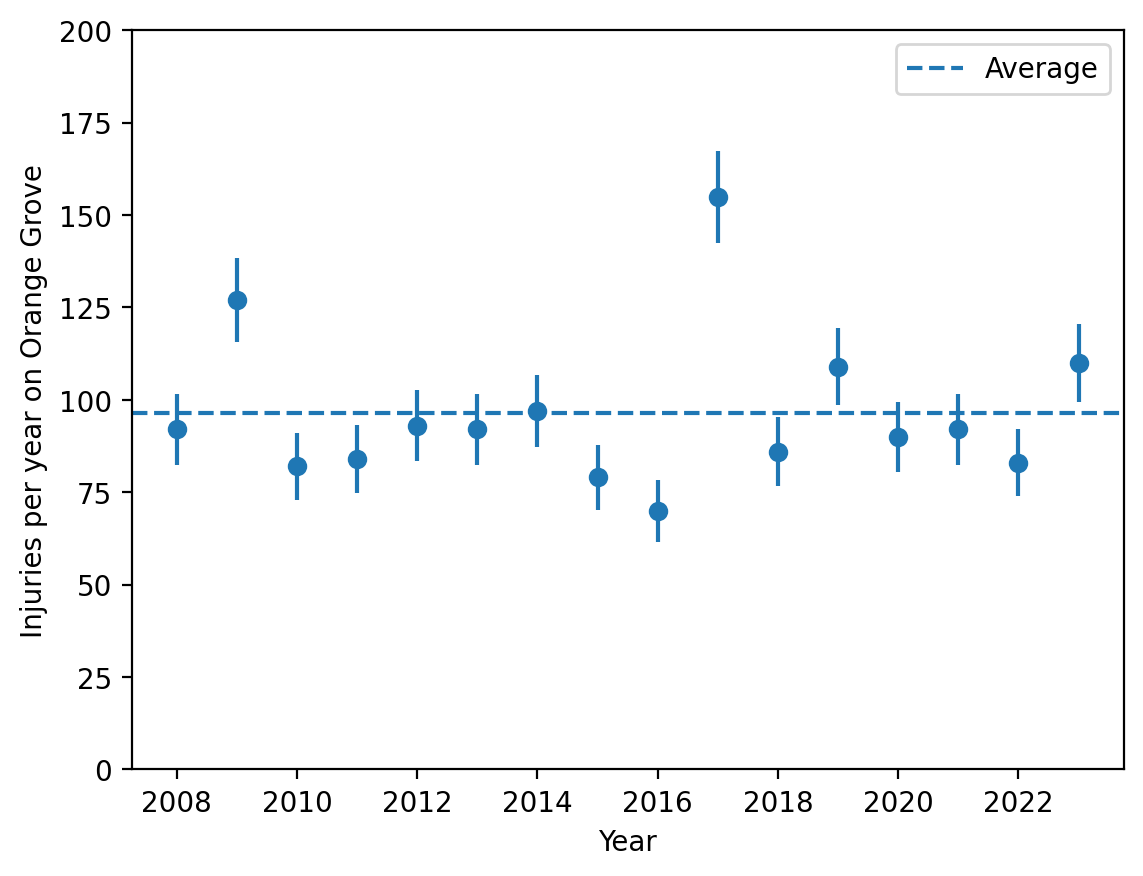

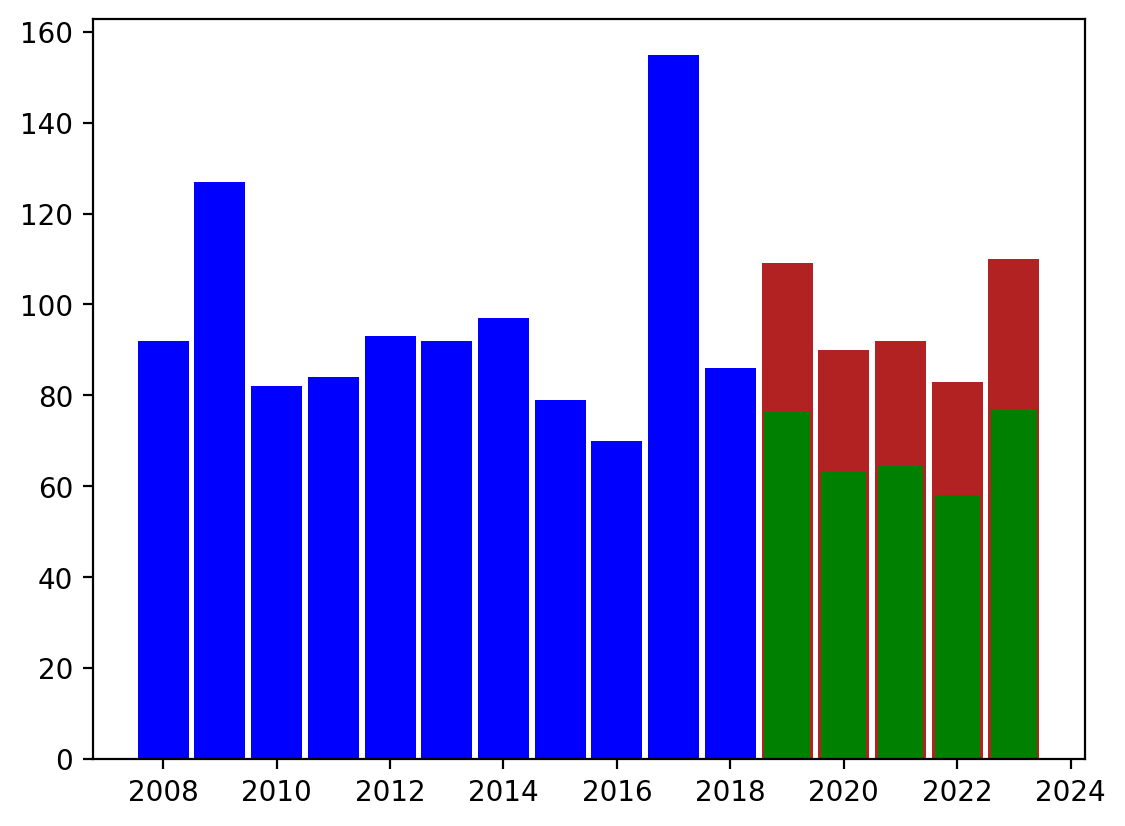

In [44]:
# -- Count injuries
injurydict = {}
for i in range(0,len(injuries)):
    yr = year[i]
    inj = injuries[i]
    if yr in injurydict:
        injurydict[yr] = injurydict[yr] + inj
    else:
        injurydict[yr] = inj

print(injurydict)
ordered_injury = sorted(injurydict.items())

print(ordered_injury)
injyr, injcount = zip(*ordered_injury)
injcount = np.array(injcount, dtype='float')

plt.scatter(injyr, injcount)
plt.ylim(0,200)

errorbar = np.sqrt(injcount)
plt.errorbar(injyr, injcount, errorbar, linestyle='None')
avg = np.mean(injcount)
plt.axhline(avg, linestyle='--', label='Average')
plt.ylabel("Injuries per year on Orange Grove")
plt.xlabel("Year")
plt.legend()

print(avg)

#plt.axhline(avg*0.7, linestyle='-.', color='green')

plt.figure()
plt.bar(injyr, injcount, color='blue', width=0.9)
plt.bar(injyr[-5:], injcount[-5:], color='firebrick', width=0.9)
plt.bar(injyr[-5:], 0.7*injcount[-5:], color='green', width=0.8)

## Counting Collisions

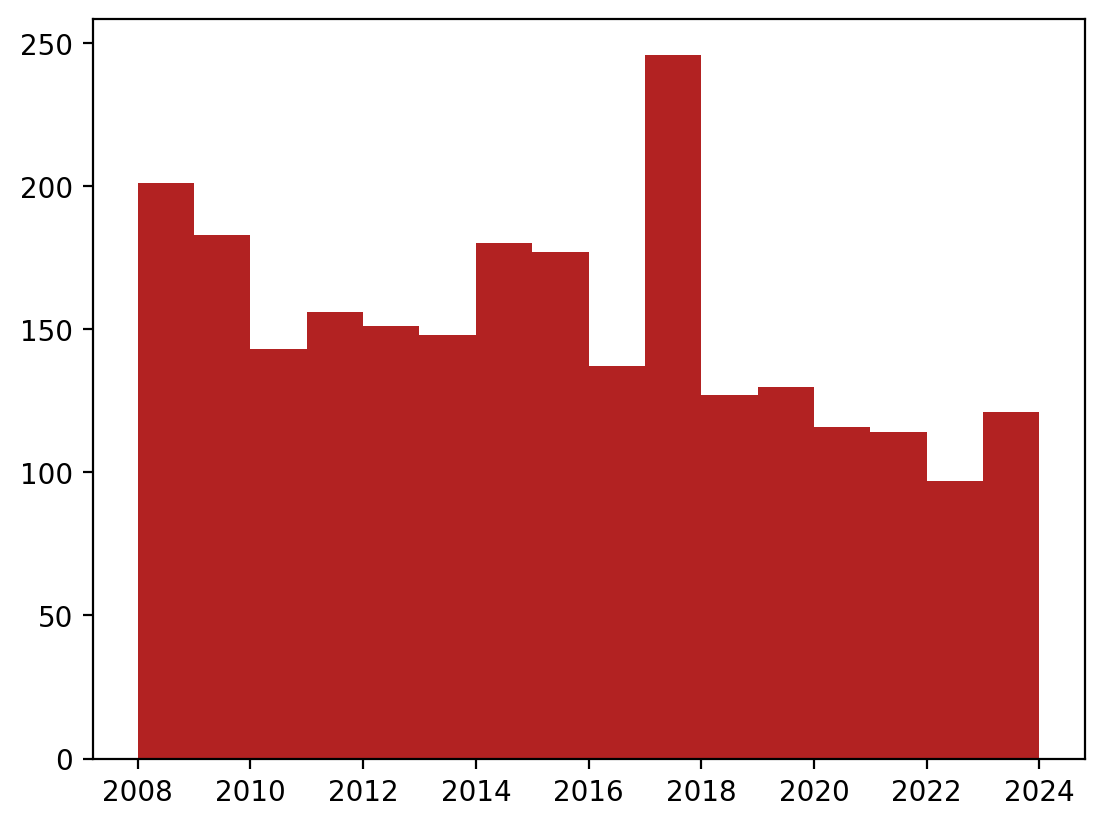

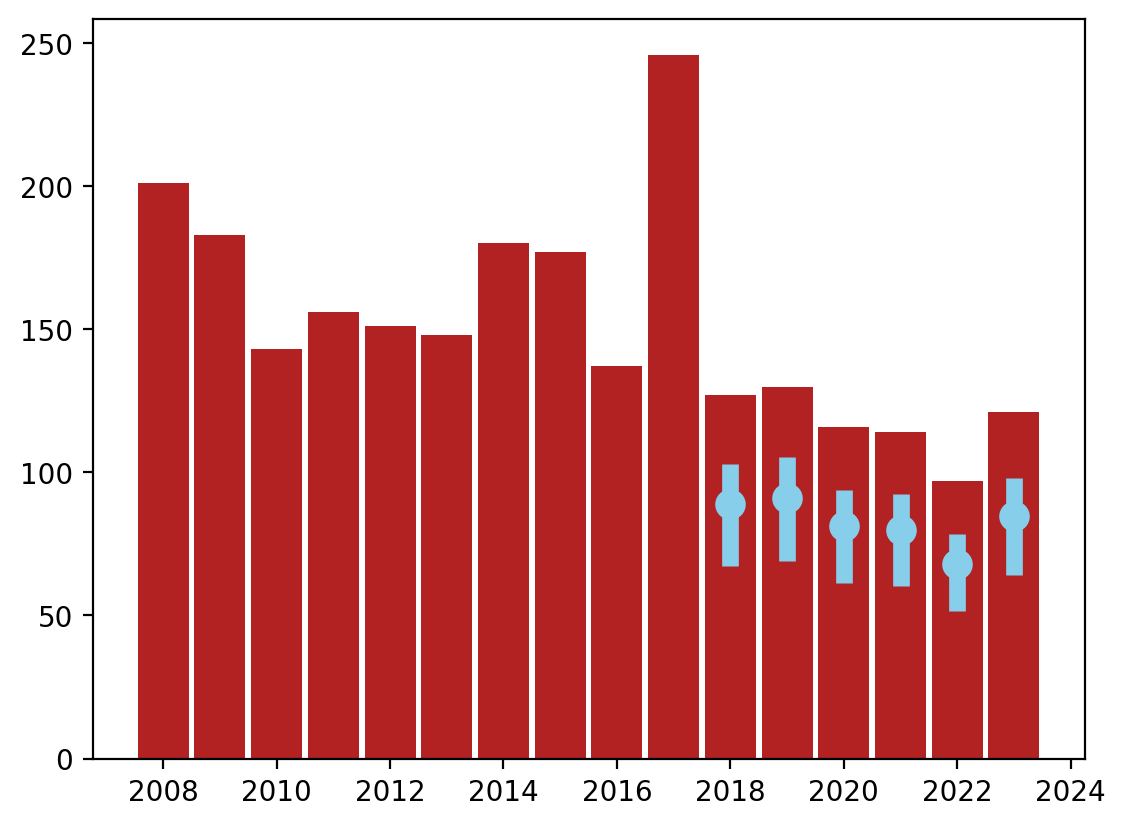

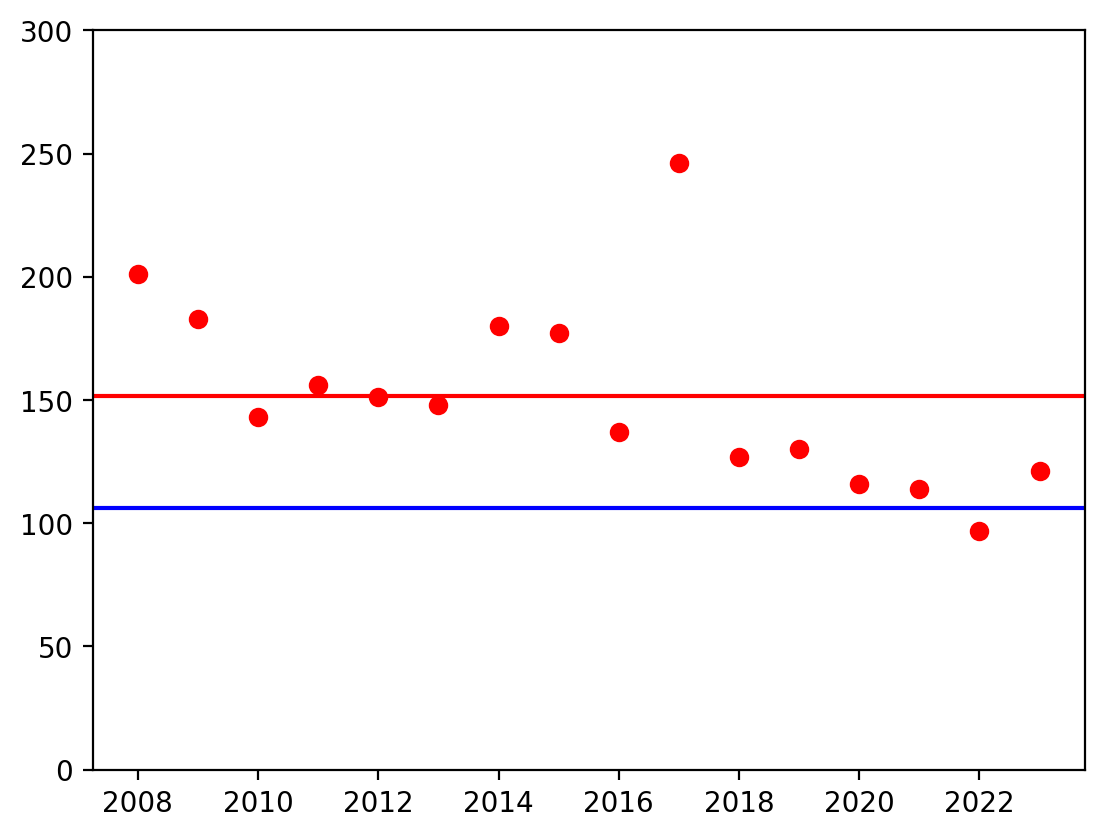

In [45]:
import matplotlib.pyplot as plt
from adjustText import adjust_text
%config InlineBackend.figure_format='retina'

# -- histogram by year
bins = np.arange(2008,2025)
value, bins, patches = plt.hist(year, bins=bins, color='firebrick')

plt.figure()
plt.bar(bins[:-1], value, color='firebrick', width=0.9)
#plt.bar(bins[10:-1], 0.7*value[10:], color='blue')

future = value[10:]
lower_error = 0.17 * future
upper_error = 0.11 * future
asymmetric_error = [lower_error, upper_error]

plt.errorbar(bins[10:-1], 0.7*future, yerr=asymmetric_error, fmt='o', color='skyblue', markersize=10, linewidth=6)


plt.figure()
plt.scatter(bins[0:-1],value, c='r')
plt.ylim(0,300)

avg = value.mean()

plt.axhline(y = avg, color = 'r', linestyle = '-') 

plt.axhline(y = avg*.7, color = 'b', linestyle = '-') 
